## **usia**

In [1]:
import pandas as pd

usia = pd.read_excel('/content/usia.xlsx')

In [2]:
usia.to_csv("usia.csv", index=False)

In [3]:
usia = pd.read_csv('/content/clean_usia.csv')

In [4]:
usia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Berat_badan     68 non-null     int64  
 1   Tinggi_badan    68 non-null     int64  
 2   Usia            68 non-null     int64  
 3   Usia_kandungan  68 non-null     int64  
 4   Air             68 non-null     int64  
 5   Energi          68 non-null     int64  
 6   Protein         68 non-null     int64  
 7   Lemak_total     68 non-null     float64
 8   Karbohidrat     68 non-null     int64  
 9   Kalsium         68 non-null     int64  
 10  Fosfor          68 non-null     int64  
 11  VitaminB1       68 non-null     float64
 12  VitaminB2       68 non-null     float64
 13  VitaminC        68 non-null     int64  
 14  Cluster         68 non-null     int64  
dtypes: float64(3), int64(12)
memory usage: 8.1 KB


In [5]:
usia.isnull().sum()

Berat_badan       0
Tinggi_badan      0
Usia              0
Usia_kandungan    0
Air               0
Energi            0
Protein           0
Lemak_total       0
Karbohidrat       0
Kalsium           0
Fosfor            0
VitaminB1         0
VitaminB2         0
VitaminC          0
Cluster           0
dtype: int64

In [6]:
usia.head(2)

,Berat_badan,Tinggi_badan,Usia,Usia_kandungan,Air,Energi,Protein,Lemak_total,Karbohidrat,Kalsium,Fosfor,VitaminB1,VitaminB2,VitaminC,Cluster
0,48,156,13,1,2400,2230,66,72.3,325,1400,1250,1.4,1.3,75,2
1,48,156,14,2,2400,2230,66,72.3,325,1400,1250,1.4,1.3,75,2


In [7]:
food = pd.read_csv('/content/clean_makanan.csv')

In [9]:
food.isnull().sum()

Nama_pangan    0
Air            0
Energi         0
Protein        0
Lemak_total    0
Karbohidrat    0
Kalsium        0
Fosfor         0
VitaminB1      0
VitaminB2      0
VitaminC       0
dtype: int64

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [12]:
# Mengambil atribut yang diperlukan untuk clustering
df_clustering = usia[['Berat_badan', 'Tinggi_badan', 'Usia', 'Usia_kandungan', 'Air', 'Energi', 'Protein', 'Lemak_total', 'Karbohidrat', 'Kalsium', 'Fosfor', 'VitaminB1', 'VitaminB2', 'VitaminC']]

# Standardisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)


In [13]:
# Menentukan nilai k yang akan diuji
k_values = range(2, 10)

# Inertia (Sum of Squared Errors)
inertia_values = []
silhouette_scores = []

In [14]:
# Melakukan clustering dengan berbagai nilai k
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

for k in k_values:
    # Membuat objek KMeans dengan nilai k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Melakukan clustering pada dataset
    kmeans.fit(df_clustering)
    
    # Menyimpan nilai inertia
    inertia_values.append(kmeans.inertia_)
    
    # Menghitung silhouette score
    silhouette_scores.append(silhouette_score(df_clustering, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

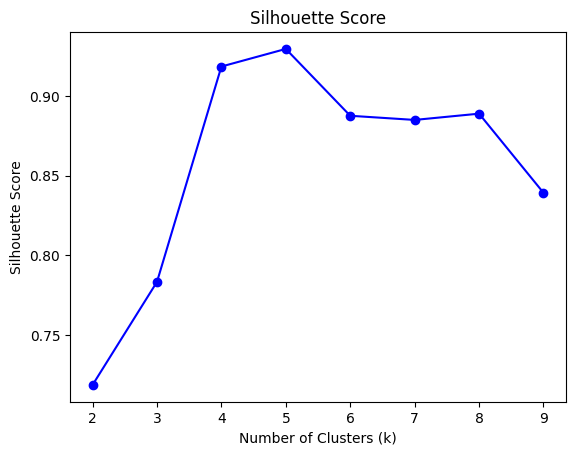

In [15]:
# Plot silhouette score
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [16]:
usia.shape

(68, 15)

In [17]:
# Jumlah cluster yang diinginkan
k = 8

# Membuat objek KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Melakukan clustering pada dataset usia
kmeans.fit(df_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

In [18]:
labels = kmeans.labels_

In [19]:
# Menambahkan label cluster ke dalam dataframe usia
usia['Cluster'] = kmeans.labels_

In [20]:
# Menampilkan hasil klustering pada dataset usia
for i in range(len(usia)):
    print("Data", usia.loc[i], "termasuk ke dalam kluster", labels[i])

Data Berat_badan         48.0
Tinggi_badan       156.0
Usia                13.0
Usia_kandungan       1.0
Air               2400.0
Energi            2230.0
Protein             66.0
Lemak_total         72.3
Karbohidrat        325.0
Kalsium           1400.0
Fosfor            1250.0
VitaminB1            1.4
VitaminB2            1.3
VitaminC            75.0
Cluster              2.0
Name: 0, dtype: float64 termasuk ke dalam kluster 2
Data Berat_badan         48.0
Tinggi_badan       156.0
Usia                14.0
Usia_kandungan       2.0
Air               2400.0
Energi            2230.0
Protein             66.0
Lemak_total         72.3
Karbohidrat        325.0
Kalsium           1400.0
Fosfor            1250.0
VitaminB1            1.4
VitaminB2            1.3
VitaminC            75.0
Cluster              2.0
Name: 1, dtype: float64 termasuk ke dalam kluster 2
Data Berat_badan         48.0
Tinggi_badan       156.0
Usia                15.0
Usia_kandungan       3.0
Air               2400.0
Energi

In [21]:
import numpy as np

# Menghitung frekuensi masing-masing label kelompok
cluster_counts = np.bincount(labels)

# Menampilkan jumlah data dalam setiap kelompok
for cluster_label, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_label}: {count} data")

Cluster 0: 11 data
Cluster 1: 10 data
Cluster 2: 3 data
Cluster 3: 16 data
Cluster 4: 3 data
Cluster 5: 10 data
Cluster 6: 11 data
Cluster 7: 4 data


In [22]:
usia

,Berat_badan,Tinggi_badan,Usia,Usia_kandungan,Air,Energi,Protein,Lemak_total,Karbohidrat,Kalsium,Fosfor,VitaminB1,VitaminB2,VitaminC,Cluster
0,48,156,13,1,2400,2230,66,72.3,325,1400,1250,1.4,1.3,75,2
1,48,156,14,2,2400,2230,66,72.3,325,1400,1250,1.4,1.3,75,2
2,48,156,15,3,2400,2230,66,72.3,325,1400,1250,1.4,1.3,75,2
3,52,159,16,4,2450,2280,66,72.3,325,1400,1250,1.4,1.3,85,4
4,52,159,17,5,2450,2280,66,72.3,325,1400,1250,1.4,1.3,85,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,53,157,76,23,1850,1850,68,47.3,270,1400,700,1.4,1.4,85,3
64,53,157,77,24,1850,1850,68,47.3,270,1400,700,1.4,1.4,85,3
65,53,157,78,25,1850,1850,68,47.3,270,1400,700,1.4,1.4,85,3
66,53,157,79,26,1850,1850,68,47.3,270,1400,700,1.4,1.4,85,3


In [ ]:
usia.to_csv("clean_usia.csv", index=False)

In [23]:
cluster_2 = usia[usia['Cluster'] == 2]
print(cluster_2)


   Berat_badan  Tinggi_badan  Usia  Usia_kandungan   Air  Energi  Protein  \
0           48           156    13               1  2400    2230       66   
1           48           156    14               2  2400    2230       66   
2           48           156    15               3  2400    2230       66   

   Lemak_total  Karbohidrat  Kalsium  Fosfor  VitaminB1  VitaminB2  VitaminC  \
0         72.3          325     1400    1250        1.4        1.3        75   
1         72.3          325     1400    1250        1.4        1.3        75   
2         72.3          325     1400    1250        1.4        1.3        75   

   Cluster  
0        2  
1        2  
2        2  


## **Food**

In [ ]:
makanan = pd.read_excel('/content/MAKANAN.xlsx')

In [ ]:
makanan.to_csv("makanan.csv", index=False)

In [ ]:
makanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama_pangan  1184 non-null   object 
 1   Air          1118 non-null   float64
 2   Energi       1113 non-null   float64
 3   Protein      1113 non-null   float64
 4   Lemak_total  1113 non-null   float64
 5   Karbohidrat  1113 non-null   float64
 6   Kalsium      1113 non-null   float64
 7   Fosfor       1113 non-null   float64
 8   VitaminB1    1118 non-null   float64
 9   VitaminB2    1129 non-null   float64
 10  VitaminC     1121 non-null   float64
dtypes: float64(10), object(1)
memory usage: 101.9+ KB


In [ ]:
makanan.isnull().sum()

Nama_pangan    0
Air            0
Energi         0
Protein        0
Lemak_total    0
Karbohidrat    0
Kalsium        0
Fosfor         0
VitaminB1      0
VitaminB2      0
VitaminC       0
dtype: int64

In [ ]:
makanan.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)


In [ ]:
# Daftar kolom yang akan diubah ke tipe data numerik
kolom_numerik = ['Air', 'Energi', 'Protein', 'Lemak_total', 'Karbohidrat', 'Kalsium', 'Fosfor', 'VitaminB1', 'VitaminB2', 'VitaminC']

# Mengonversi kolom ke tipe data numerik
makanan[kolom_numerik] = makanan[kolom_numerik].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Daftar kolom yang memiliki missing values
kolom_missing = ['Air', 'Energi', 'Protein', 'Lemak_total', 'Karbohidrat', 'Kalsium', 'Fosfor', 'VitaminB1', 'VitaminB2', 'VitaminC']

# Mengganti missing values dengan mean
makanan[kolom_missing] = makanan[kolom_missing].fillna(makanan[kolom_missing].mean())


In [ ]:
makanan.to_csv("clean_makanan.csv", index=False)

In [ ]:
clean_makanan = pd.read_csv('clean_makanan.csv')

## **cluster makanan**

In [27]:
from sklearn.cluster import KMeans

# Mengambil atribut yang digunakan untuk klustering
atribut_klustering = food[['Air', 'Energi', 'Protein', 'Lemak_total', 'Karbohidrat', 'Kalsium', 'Fosfor', 'VitaminB1', 'VitaminB2', 'VitaminC']]


In [29]:
# Menentukan jumlah kluster
jumlah_kluster = 8

# Melakukan klustering menggunakan K-means
kmeans = KMeans(n_clusters=jumlah_kluster, random_state=0)
food['Cluster'] = kmeans.fit_predict(atribut_klustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
label_food = kmeans.labels_

In [31]:
# Menambahkan label cluster ke dalam dataframe usia
food['Cluster'] = kmeans.labels_

In [79]:
food.head(2)

,Nama_pangan,Air,Energi,Protein,Lemak_total,Karbohidrat,Kalsium,Fosfor,VitaminB1,VitaminB2,VitaminC,Cluster
0,"Bayam ,rebus",93.5,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
1,"Buncis, rebus",90.6,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1


In [80]:
food.to_csv("cluster_makanan.csv", index=False)

In [90]:
import pickle

# Menyimpan model clustering ke dalam file .pickle
with open('model_clustering.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

## **proses rekomendasi**

In [ ]:
makanan.head(3)

,Nama_pangan,Air,Energi,Protein,Lemak_total,Karbohidrat,Kalsium,Fosfor,VitaminB1,VitaminB2,VitaminC,Cluster
0,"Bayam ,rebus",93.5,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
1,"Buncis, rebus",90.6,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
2,"Daun kacang panjang, kukus",87.2,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1


In [77]:
food.head(2)

,Nama_pangan,Air,Energi,Protein,Lemak_total,Karbohidrat,Kalsium,Fosfor,VitaminB1,VitaminB2,VitaminC,Cluster
0,"Bayam ,rebus",93.5,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
1,"Buncis, rebus",90.6,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1


In [ ]:
usia.head(2)

,Berat_badan,Tinggi_badan,Usia,Usia_kandungan,Air,Energi,Protein,Lemak_total,Karbohidrat,Kalsium,Fosfor,VitaminB1,VitaminB2,VitaminC,Cluster
0,48,156,13,1,2400,2230,66,72.3,325,1400,1250,1.4,1.3,75,2
1,48,156,14,2,2400,2230,66,72.3,325,1400,1250,1.4,1.3,75,2


In [ ]:
makanan

,Nama_pangan,Air,Energi,Protein,Lemak_total,Karbohidrat,Kalsium,Fosfor,VitaminB1,VitaminB2,VitaminC,Cluster
0,"Bayam ,rebus",93.50,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
1,"Buncis, rebus",90.60,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
2,"Daun kacang panjang, kukus",87.20,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
3,"Daun singkong, rebus",90.50,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
4,"Daun talas, rebus",91.60,232.704403,8.365283,6.719155,35.733854,94.847217,143.931288,107.659396,95.421405,6.370384,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1179,"Sup, jamur dengan kaldu sapi, kalengan, disiap...",92.08,35.000000,1.290000,1.650000,3.810000,4.000000,15.000000,0.014000,0.039000,0.400000,3
1180,"Sup, jamur daging sapi, kalengan, kental",85.50,61.000000,4.600000,2.400000,5.200000,4.000000,29.000000,0.020000,0.060000,0.000000,3
1181,"Sup, jamur daging sapi, kalengan, disiapkan de...",92.60,30.000000,2.370000,1.230000,2.600000,2.000000,14.000000,0.016000,0.023000,1.900000,3
1182,"Sup, jamur ayam, kalengan, kental",80.40,100.000000,1.610000,4.840000,11.950000,23.000000,22.000000,0.020000,0.090000,0.000000,3


**1 rekomendasi**

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# data baru
contoh_data_usia = [60, 165, 25, 2]

# Hitung jarak Euclidean antara contoh data baru dengan setiap contoh data dalam usia
distances = euclidean_distances(np.array([contoh_data_usia]), usia[['Berat_badan', 'Tinggi_badan', 'Usia', 'Usia_kandungan']])


In [ ]:

# Dapatkan indeks contoh data terdekat
indeks_terdekat = distances.argmin()


In [ ]:
# Dapatkan atribut "Nama_pangan" dari dataset 2 berdasarkan indeks terdekat
rekomendasi_makanan = makanan.iloc[indeks_terdekat]['Nama_pangan']

In [ ]:
print(rekomendasi_makanan)

Selada, rebus


**5 Menu rekomendasi**

In [82]:
from sklearn.metrics import euclidean_distances
import numpy as np

contoh_data = {
    'Air': 2650,
    'Energi': 2550,
    'Protein': 70,
    'Lemak_total': 67.3,
    'Karbohidrat': 400,
    'Kalsium': 1200,
    'Fosfor': 700,
    'VitaminB1': 1.4,
    'VitaminB2': 1.4,
    'VitaminC': 85
}


In [83]:
# Hitung jarak Euclidean antara contoh data baru dan setiap contoh data dalam dataset makanan
distances = euclidean_distances(
    np.array([[contoh_data['Air'], contoh_data['Energi'], contoh_data['Protein'], contoh_data['Lemak_total'],
               contoh_data['Karbohidrat'], contoh_data['Kalsium'], contoh_data['Fosfor'], contoh_data['VitaminB1'],
               contoh_data['VitaminB2'], contoh_data['VitaminC']]]),
    food[['Air', 'Energi', 'Protein', 'Lemak_total', 'Karbohidrat', 'Kalsium', 'Fosfor', 'VitaminB1', 'VitaminB2', 'VitaminC']]
)


In [91]:
num_recommendations = 5
closest_indices = np.argsort(distances)

In [92]:
closest_indices = np.argsort(distances.flatten())[:num_recommendations]
recommendations = food.loc[closest_indices, 'Nama_pangan']

print(recommendations)


559                     Susu bubuk
701             Tinoransa, masakan
558    Susu asam untuk bayi, bubuk
307      Teripang, dendeng, mentah
306           Teri balado, masakan
Name: Nama_pangan, dtype: object


In [93]:
from tabulate import tabulate
# Membuat DataFrame dari rekomendasi
df_recommendations = pd.DataFrame({'Rekomendasi': recommendations})

# Konversi DataFrame menjadi tabel format Markdown
table = tabulate(df_recommendations, headers='keys', tablefmt='github')

# Menampilkan tabel rekomendasi
print(table)

|     | Rekomendasi                 |
|-----|-----------------------------|
| 559 | Susu bubuk                  |
| 701 | Tinoransa, masakan          |
| 558 | Susu asam untuk bayi, bubuk |
| 307 | Teripang, dendeng, mentah   |
| 306 | Teri balado, masakan        |


In [95]:
# Memuat kembali model rekomendasi dari file .pickle
import pickle

# Menyimpan rekomendasi ke dalam file .pickle
with open('rekomendasi.pickle', 'wb') as f:
    pickle.dump(recommendations, f)